# Loading the Data Files

In [2]:
import pandas as pd
import numpy as np


**Check the first few rows to understand the data's structure.**

In [4]:
df = pd.read_csv('/content/2012_SAT_Results_20250426.csv')
df.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


**Check the number of rows, columns, data types, and missing values.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DBN                              478 non-null    object
 1   SCHOOL NAME                      478 non-null    object
 2   Num of SAT Test Takers           478 non-null    object
 3   SAT Critical Reading Avg. Score  478 non-null    object
 4   SAT Math Avg. Score              478 non-null    object
 5   SAT Writing Avg. Score           478 non-null    object
dtypes: object(6)
memory usage: 22.5+ KB


**See if there are any duplicate rows.**

In [10]:
df.duplicated().sum()

np.int64(0)

**Get basic statistics to see the distribution of numerical columns.**

In [11]:
df.describe()


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
count,478,478,478,478,478,478
unique,478,478,175,164,173,163
top,79X490,PHOENIX ACADEMY,s,s,s,s
freq,1,1,57,57,57,57


# Step 2: Handle Missing Data

In [13]:
df.isnull().sum()

,0
DBN,0
SCHOOL NAME,0
Num of SAT Test Takers,0
SAT Critical Reading Avg. Score,0
SAT Math Avg. Score,0
SAT Writing Avg. Score,0


# Step 4: Standardize Data Formats

**Convert strings to lowercase to ensure consistency.**

In [19]:
df['SCHOOL NAME'] = df['SCHOOL NAME'].str.lower()
df['Num of SAT Test Takers'] = pd.to_numeric(df['Num of SAT Test Takers'], errors='coerce')
df['SAT Critical Reading Avg. Score'] = pd.to_numeric(df['SAT Critical Reading Avg. Score'], errors='coerce')
df['SAT Math Avg. Score'] = pd.to_numeric(df['SAT Math Avg. Score'], errors='coerce')
df['SAT Writing Avg. Score'] = pd.to_numeric(df['SAT Writing Avg. Score'], errors='coerce')

df.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,henry street school for international studies,29.0,355.0,404.0,363.0
1,01M448,university neighborhood high school,91.0,383.0,423.0,366.0
2,01M450,east side community school,70.0,377.0,402.0,370.0
3,01M458,forsyth satellite academy,7.0,414.0,401.0,359.0
4,01M509,marta valle high school,44.0,390.0,433.0,384.0


# Step 5: Outlier Detection and Removal

<Axes: xlabel='SAT Critical Reading Avg. Score'>

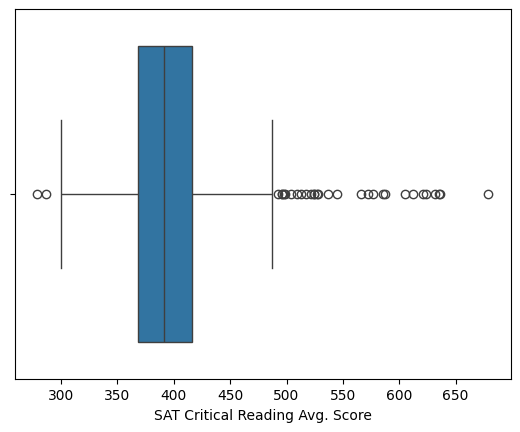

In [20]:
import seaborn as sns
sns.boxplot(x=df['SAT Critical Reading Avg. Score'])


In [24]:
from scipy import stats
df = df[(np.abs(stats.zscore(df['SAT Critical Reading Avg. Score'])) < 3)]


# Check for Inconsistent Values:

In [26]:
# This code Removes rows with zero or negative test takers
df = df[df['Num of SAT Test Takers'] > 0]


# Re-check the cleaned dataset.

In [27]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DBN                              0 non-null      object 
 1   SCHOOL NAME                      0 non-null      object 
 2   Num of SAT Test Takers           0 non-null      float64
 3   SAT Critical Reading Avg. Score  0 non-null      float64
 4   SAT Math Avg. Score              0 non-null      float64
 5   SAT Writing Avg. Score           0 non-null      float64
dtypes: float64(4), object(2)
memory usage: 0.0+ bytes
None


# Export Cleaned Data:

In [30]:
df.to_csv('cleaned_schools_data.csv', index=False)
